#Expliración de datos
**Proyecto Deep Learning**

Dataset URL: https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017
License(s): CC0-1.0
  0% 0.00/1.16M [00:00<?, ?B/s]
100% 1.16M/1.16M [00:00<00:00, 680MB/s]
Dimensiones del dataset: (48532, 9)

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48532 entries, 0 to 48531
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        48532 non-null  object
 1   home_team   48532 non-null  object
 2   away_team   48532 non-null  object
 3   home_score  48532 non-null  int64 
 4   away_score  48532 non-null  int64 
 5   tournament  48532 non-null  object
 6   city        48532 non-null  object
 7   country     48532 non-null  object
 8   neutral     48532 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 3.0+ MB
None

Valores nulos por columna:
date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0


/tmp/ipython-input-1391131155.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="result", data=df, order=["HomeWin", "Draw", "AwayWin"], palette="Set2")


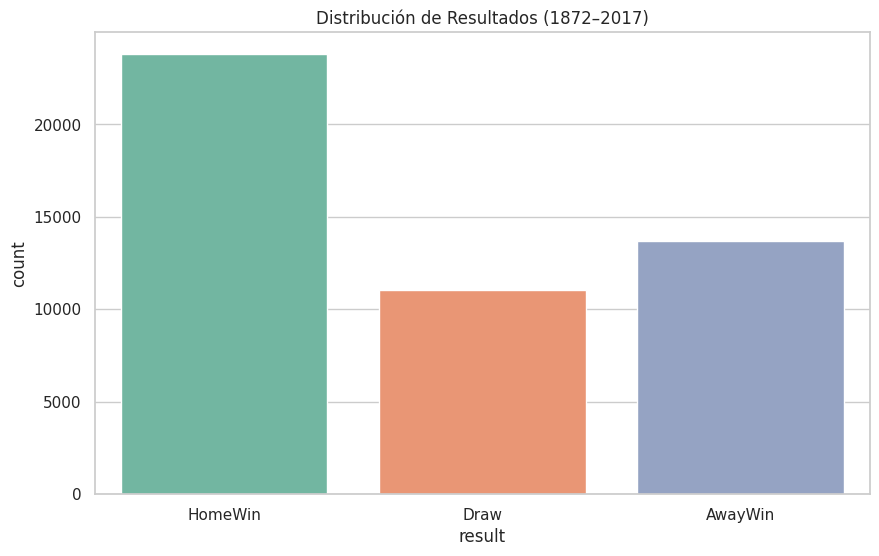

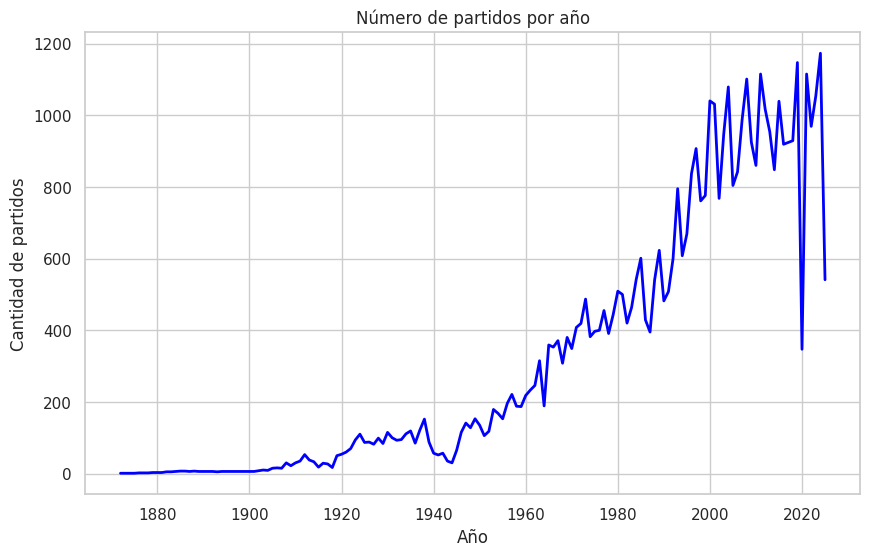

/tmp/ipython-input-1391131155.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams.values, y=top_teams.index, palette="viridis")


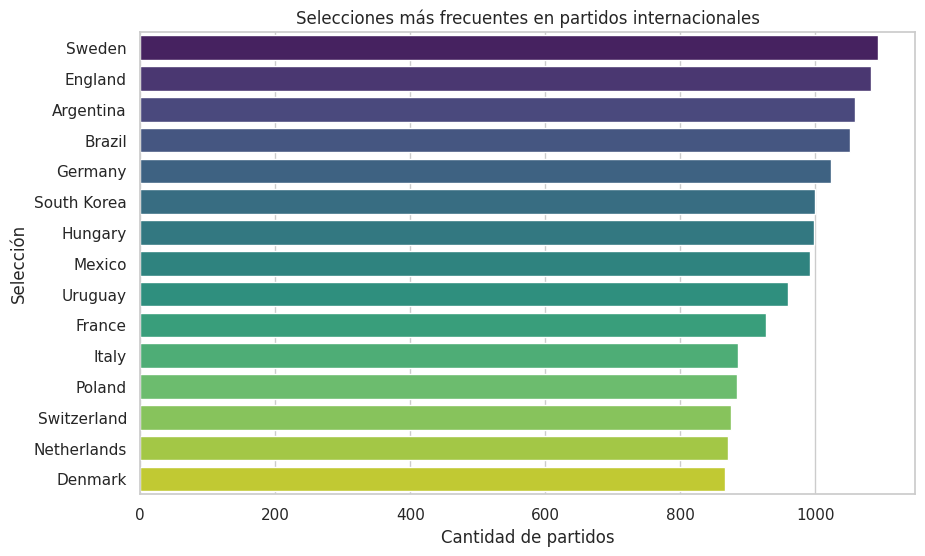

Resumen del EDA:
- Total de partidos: 48532
- Total de equipos diferentes: 333
- La distribución de resultados muestra clara ventaja del equipo local.
- El número de partidos ha crecido de forma sostenida a lo largo del tiempo.
- Selecciones como Brasil, Alemania, Inglaterra y Argentina son de las más activas.


In [2]:
# ==========================================================
# File: notebooks/01-exploracion-datos.ipynb
# Exploración de Datos - Proyecto Deep Learning en Fútbol
# ==========================================================

# ---------------------------
# 1. Instalación de librerías
# ---------------------------
!pip install kaggle --quiet
!pip install pandas numpy matplotlib seaborn --quiet

# ---------------------------
# 2. Importación de librerías
# ---------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuración estética
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# ---------------------------
# 3. Descarga del dataset desde Kaggle
# ---------------------------
# ⚠️ IMPORTANTE: debes subir tu kaggle.json a Colab
# desde la ruta /content/.kaggle/kaggle.json

!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Descargar dataset
!kaggle datasets download -d martj42/international-football-results-from-1872-to-2017 -p /content/data --unzip

# ---------------------------
# 4. Carga del dataset
# ---------------------------
df = pd.read_csv("/content/data/results.csv")
print("Dimensiones del dataset:", df.shape)
df.head()

# ---------------------------
# 5. Inspección general
# ---------------------------
print("\nInformación general del dataset:")
print(df.info())

print("\nValores nulos por columna:")
print(df.isnull().sum())

print("\nEstadísticas básicas:")
print(df.describe(include="all"))

# ---------------------------
# 6. Creación de variable objetivo (resultado)
# ---------------------------
def match_result(row):
    if row["home_score"] > row["away_score"]:
        return "HomeWin"
    elif row["home_score"] < row["away_score"]:
        return "AwayWin"
    else:
        return "Draw"

df["result"] = df.apply(match_result, axis=1)

print("\nDistribución de resultados:")
print(df["result"].value_counts(normalize=True))

# ---------------------------
# 7. Visualización de resultados
# ---------------------------
sns.countplot(x="result", data=df, order=["HomeWin", "Draw", "AwayWin"], palette="Set2")
plt.title("Distribución de Resultados (1872–2017)")
plt.show()

# ---------------------------
# 8. Evolución temporal de partidos
# ---------------------------
df["year"] = pd.to_datetime(df["date"]).dt.year
matches_per_year = df.groupby("year").size()

matches_per_year.plot(kind="line", linewidth=2, color="blue")
plt.title("Número de partidos por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de partidos")
plt.show()

# ---------------------------
# 9. Selecciones más frecuentes
# ---------------------------
teams = pd.concat([df["home_team"], df["away_team"]])
top_teams = teams.value_counts().head(15)

sns.barplot(x=top_teams.values, y=top_teams.index, palette="viridis")
plt.title("Selecciones más frecuentes en partidos internacionales")
plt.xlabel("Cantidad de partidos")
plt.ylabel("Selección")
plt.show()

# ---------------------------
# 10. Resumen
# ---------------------------
print("Resumen del EDA:")
print(f"- Total de partidos: {df.shape[0]}")
print(f"- Total de equipos diferentes: {teams.nunique()}")
print("- La distribución de resultados muestra clara ventaja del equipo local.")
print("- El número de partidos ha crecido de forma sostenida a lo largo del tiempo.")
print("- Selecciones como Brasil, Alemania, Inglaterra y Argentina son de las más activas.")
